###  Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Data

In [37]:
data = pd.read_csv(r"C:\Users\NAVJOT\Downloads\archive (2)\sp500_stocks.csv")

In [38]:
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.254002,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.976814,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.600502,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.632481,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.946968,70.501671,70.501671,69.648827,69.974915,4073337.0


### Preprocess Data

In [39]:
data = data[['Date', 'Close']]

In [40]:
data['Date'] = pd.to_datetime(data['Date'])

In [41]:
data.sort_values('Date', inplace=True)

In [42]:
data.set_index('Date', inplace=True)

In [43]:
data.fillna(data.mean(), inplace=True)

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [45]:
data['Prediction'] = data['Close'].shift(-1)

In [46]:
data = data[:-1]

In [47]:
X = data.drop(columns=['Prediction']).values
y = data['Prediction'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

###  Build and Train the Model

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions

In [51]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [52]:
mse = mean_squared_error(actual, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 116813.43385531504


### Plot the Results

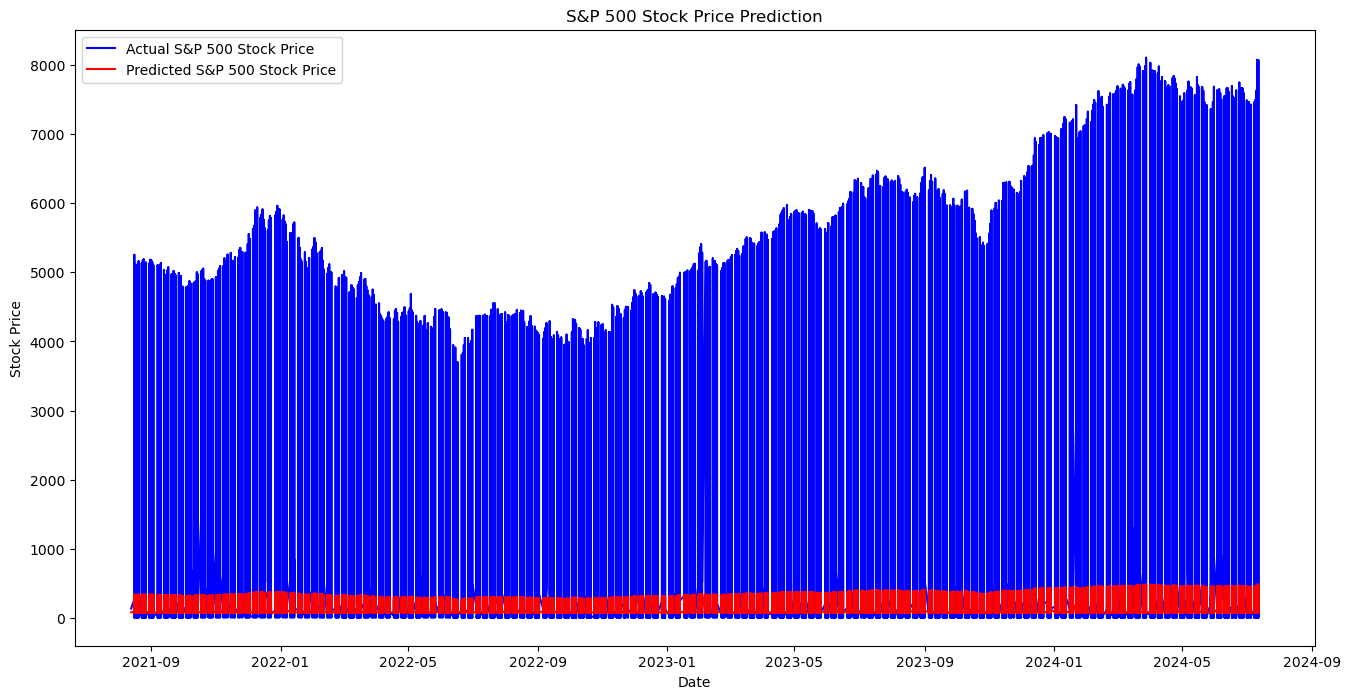

In [53]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-len(y_test):], actual, color='blue', label='Actual S&P 500 Stock Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted S&P 500 Stock Price')
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()